In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 목적

다양한 슬라이스 방식을 통한 모델 성능 비교
중앙 슬라이스만 사용: 중앙 슬라이스만으로 모델을 학습시켜, 중앙 슬라이스만으로 성능을 평가합니다.

±10mm 슬라이스: 중앙을 기준으로 ±10mm 범위의 슬라이스를 추가하여, 좀 더 넓은 범위의 정보가 모델 성능에 미치는 영향을 평가합니다.

±15mm 슬라이스: 중앙을 기준으로 ±15mm 범위의 슬라이스를 추가하여, 더 넓은 범위의 정보를 모델에 제공하고 성능에 미치는 영향을 평가합니다.

조합 슬라이스: 중앙 슬라이스와 ±10mm, ±15mm 슬라이스를 모두 포함하여, 다양한 범위의 정보를 모델에 제공하고 이 조합이 성능에 미치는 영향을 평가합니다.

중앙 자름 + 중앙 기준 10으로 양옆 -> 3장
중앙 자름 + 중앙 기준 15로 양옆 -> 3장
중앙 자름 + 중앙 기준 10으로 양옆 + 중앙 기준 15로 양옆 -> 5장


## 메타데이터 불러오기

In [2]:
ROOT_DIR = "/content/drive/MyDrive/BrainWorks/data/oasis-2"

In [3]:
import os
import pandas as pd

# 메타데이터 경로 설정
metadata_path = os.path.join(ROOT_DIR, 'oasis_longitudinal_demographics-8d83e569fa2e2d30.xlsx')  # 실제 메타데이터 경로로 변경

# 메타데이터 불러오기
metadata = pd.read_excel(metadata_path)
metadata

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [4]:
# 필요한 열 선택
selected_columns = ['Subject ID', 'MRI ID', 'Group', 'M/F', 'Age', 'MMSE', 'EDUC', 'SES', 'CDR']
metadata_selected = metadata[selected_columns]

In [5]:
# 각 열의 결측치 개수 확인
missing_values = metadata_selected.isnull().sum()
print("결측치 확인:", missing_values)

# 결측치가 있는 행 확인
print(metadata_selected[metadata_selected.isnull().any(axis=1)])

결측치 확인: Subject ID     0
MRI ID         0
Group          0
M/F            0
Age            0
MMSE           2
EDUC           0
SES           19
CDR            0
dtype: int64
    Subject ID         MRI ID     Group M/F  Age  MMSE  EDUC  SES  CDR
2    OAS2_0002  OAS2_0002_MR1  Demented   M   75  23.0    12  NaN  0.5
3    OAS2_0002  OAS2_0002_MR2  Demented   M   76  28.0    12  NaN  0.5
4    OAS2_0002  OAS2_0002_MR3  Demented   M   80  22.0    12  NaN  0.5
10   OAS2_0007  OAS2_0007_MR1  Demented   M   71  28.0    16  NaN  0.5
11   OAS2_0007  OAS2_0007_MR3  Demented   M   73  27.0    16  NaN  1.0
12   OAS2_0007  OAS2_0007_MR4  Demented   M   75  27.0    16  NaN  1.0
134  OAS2_0063  OAS2_0063_MR1  Demented   F   80  30.0    12  NaN  0.5
135  OAS2_0063  OAS2_0063_MR2  Demented   F   81  27.0    12  NaN  0.5
207  OAS2_0099  OAS2_0099_MR1  Demented   F   80  27.0    12  NaN  0.5
208  OAS2_0099  OAS2_0099_MR2  Demented   F   83  23.0    12  NaN  0.5
237  OAS2_0114  OAS2_0114_MR1  Demented   F  

In [6]:
# MMSE 결측치가 있는 행 제거
metadata_selected = metadata_selected.dropna(subset=['MMSE', 'SES'])

# 결측치 제거 후 데이터 확인
print(metadata_selected.isnull().sum())

Subject ID    0
MRI ID        0
Group         0
M/F           0
Age           0
MMSE          0
EDUC          0
SES           0
CDR           0
dtype: int64


In [7]:
# Group 컬럼의 숫자 버전 생성
metadata_selected['Group_num'] = metadata_selected['Group'].map({'Nondemented': 0, 'Demented': 1, 'Converted': 2})

# 변환 후 확인
print("Group 컬럼 라벨 인코딩 후:", metadata_selected['Group_num'].unique())

Group 컬럼 라벨 인코딩 후: [0 1 2]


## MRI 데이터 불러오기

In [8]:
import os
import nibabel as nib
import numpy as np
from skimage.transform import resize
import skimage.color
import gc

In [9]:
# RAW 폴더 내의 파일 경로
raw_img_path = os.path.join(ROOT_DIR, 'OAS2_RAW_PART1', 'OAS2_RAW_PART1', 'OAS2_0099_MR2', 'RAW', 'mpr-3.nifti.img')
raw_hdr_path = os.path.join(ROOT_DIR, 'OAS2_RAW_PART1', 'OAS2_RAW_PART1', 'OAS2_0099_MR2', 'RAW', 'mpr-3.nifti.hdr')

In [10]:
import nibabel as nib

# MRI 데이터 로드
img = nib.load(raw_img_path)

# 3D 데이터로 변환
img_data = img.get_fdata()

z_len = img_data.shape[2]  # Z축 길이 (슬라이스 수)

# 이미지 데이터의 기본 정보 확인
print(f"Image shape: {img_data.shape}")
print(f"Data type: {img_data.dtype}")
print(f"Z-axis length: {z_len} slices")

Image shape: (256, 256, 128, 1)
Data type: float64
Z-axis length: 128 slices


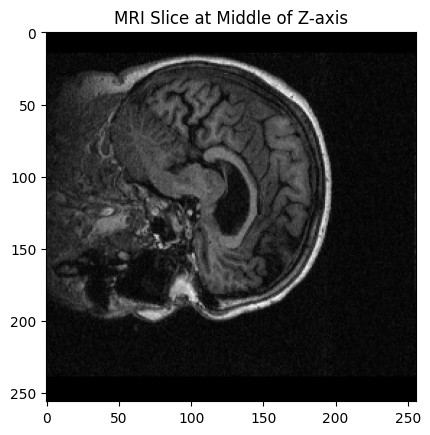

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 3D 이미지의 중간 슬라이스 시각화 (Z축 중간에서 슬라이스)
plt.imshow(img_data[:, :, img_data.shape[2]//2], cmap='gray')
plt.title("MRI Slice at Middle of Z-axis")
plt.show()

In [12]:

# 중앙 슬라이스 위치
center_z = z_len // 2

# 슬라이스 두께 (mm)
slice_thickness_mm = 1  # 슬라이스 두께를 1mm로 가정

# 밀리미터를 슬라이스 수로 변환
slices_10mm = int(10 / slice_thickness_mm)  # ±10mm
slices_15mm = int(15 / slice_thickness_mm)  # ±15mm

# 슬라이스 인덱스 계산
# ±10mm 슬라이스 (3장)
slices_10mm_indices = [center_z - slices_10mm, center_z, center_z + slices_10mm]

# ±15mm 슬라이스 (3장)
slices_15mm_indices = [center_z - slices_15mm, center_z, center_z + slices_15mm]

# ±10mm 및 ±15mm 슬라이스 (5장)
slices_combined_indices = [center_z - slices_15mm, center_z - slices_10mm, center_z, center_z + slices_10mm, center_z + slices_15mm]



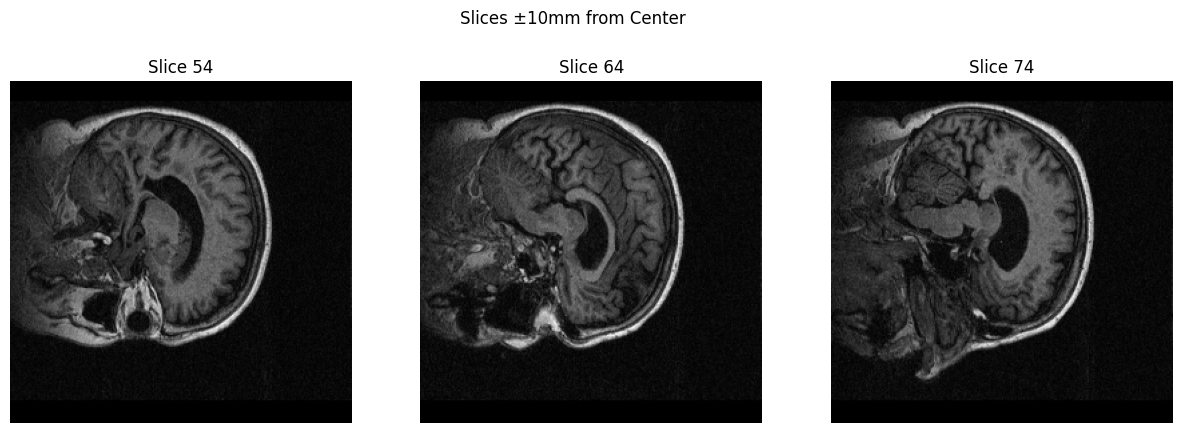

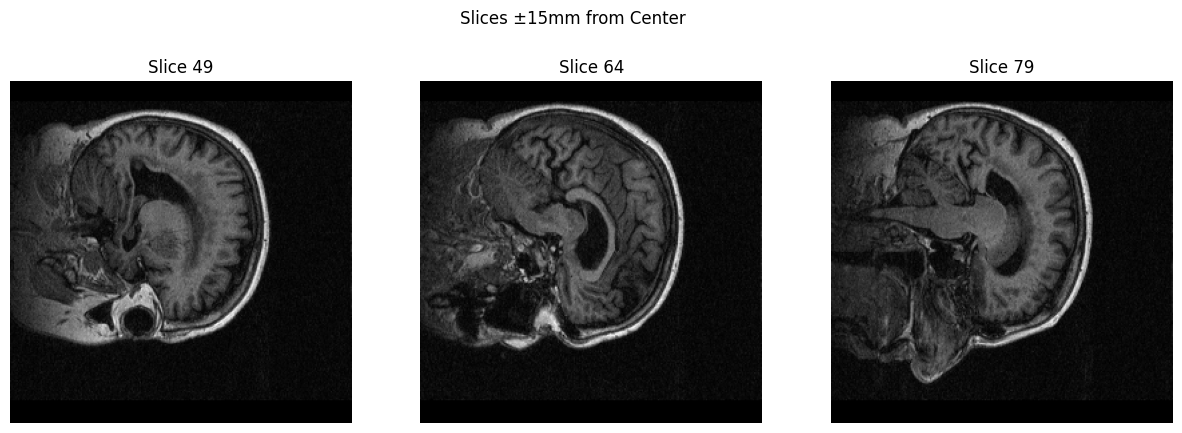

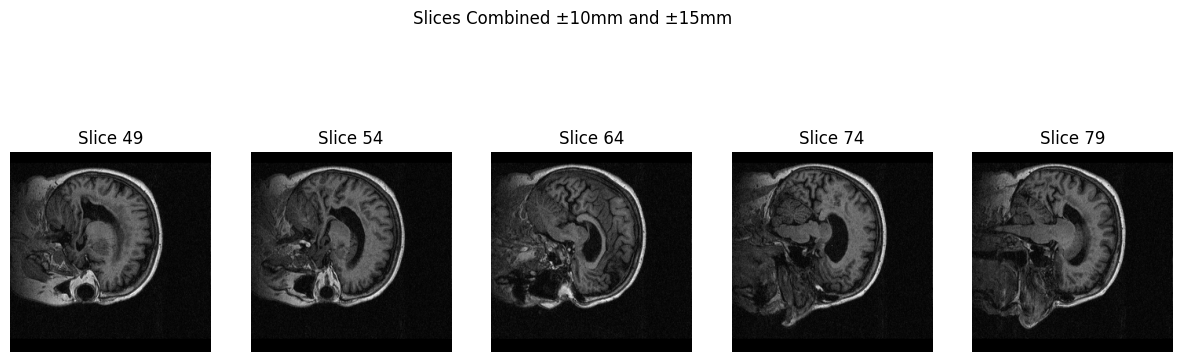

In [13]:

# 슬라이스 시각화 함수
def visualize_slices(slice_indices, title):
    fig, axes = plt.subplots(1, len(slice_indices), figsize=(15, 5))
    for i, idx in enumerate(slice_indices):
        if 0 <= idx < z_len:
            axes[i].imshow(img_data[:, :, idx], cmap='gray')
            axes[i].set_title(f'Slice {idx}')
            axes[i].axis('off')
        else:
            axes[i].set_title(f'Slice {idx} (Out of range)')
            axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

# 슬라이스 시각화
visualize_slices(slices_10mm_indices, 'Slices ±10mm from Center')
visualize_slices(slices_15mm_indices, 'Slices ±15mm from Center')
visualize_slices(slices_combined_indices, 'Slices Combined ±10mm and ±15mm')

## 이미지 전처리

In [14]:
total_files = 0
total_size = 0
folder_image_counts = []

# 배치 처리
batch_size = 50
imagestrain1 = []
labels = []
mri_ids_from_images = []

def get_image_files(mri_id):
    """해당 MRI ID에 대한 파일 경로를 검색"""
    raw_folder_part1 = os.path.join(ROOT_DIR, 'OAS2_RAW_PART1', 'OAS2_RAW_PART1', mri_id, 'RAW')
    raw_folder_part2 = os.path.join(ROOT_DIR, 'OAS2_RAW_PART2', 'OAS2_RAW_PART2', mri_id, 'RAW')

    if os.path.exists(raw_folder_part1):
        return [os.path.join(raw_folder_part1, f) for f in os.listdir(raw_folder_part1) if f.endswith('.img')]
    elif os.path.exists(raw_folder_part2):
        return [os.path.join(raw_folder_part2, f) for f in os.listdir(raw_folder_part2) if f.endswith('.img')]
    else:
        return []

In [15]:
def process_image_files(img_files):
    mri_data_list = []

    for img_file in img_files:
        try:
            img = nib.load(img_file)
            img_data = img.get_fdata()
            mri_data_list.append(img_data)
        except Exception as e:
            print(f"파일을 불러오는데 실패했습니다: {img_file}, 오류: {e}")
    return mri_data_list


In [16]:
def get_slices(img_data, center_z, slices_10mm, slices_15mm):
    # 슬라이스 인덱스 계산
    slices_10mm_indices = [center_z - slices_10mm, center_z, center_z + slices_10mm]
    slices_15mm_indices = [center_z - slices_15mm, center_z, center_z + slices_15mm]
    slices_combined_indices = [center_z - slices_15mm, center_z - slices_10mm, center_z, center_z + slices_10mm, center_z + slices_15mm]

    slices = {
        '±10mm': [img_data[:, :, idx] for idx in slices_10mm_indices if 0 <= idx < img_data.shape[2]],
        '±15mm': [img_data[:, :, idx] for idx in slices_15mm_indices if 0 <= idx < img_data.shape[2]],
        'Combined': [img_data[:, :, idx] for idx in slices_combined_indices if 0 <= idx < img_data.shape[2]]
    }
    return slices

In [17]:
def preprocess_slices(slices, target_size):
    preprocessed_images = []
    for key in slices:
        for img_slice in slices[key]:
            img_resized = resize(img_slice, target_size, anti_aliasing=True)
            preprocessed_images.append(skimage.color.gray2rgb(img_resized))
    return preprocessed_images

In [18]:
# 설정
total_files = 0
total_size = 0
folder_image_counts = []
batch_size = 50
imagestrain1 = []
labels = []
mri_ids_from_images = []

slice_thickness_mm = 1  # 슬라이스 두께를 1mm로 가정
slices_10mm = int(10 / slice_thickness_mm)  # ±10mm
slices_15mm = int(15 / slice_thickness_mm)  # ±15mm
target_size = (256, 256)  # 이미지 리사이즈 크기


In [19]:
# 슬라이스 유형별 데이터를 저장할 리스트
images_10mm = []
images_15mm = []
images_combined = []

labels_10mm = []
labels_15mm = []
labels_combined = []

mri_ids_10mm = []
mri_ids_15mm = []
mri_ids_combined = []

# 배치 처리
for i in range(0, len(metadata_selected), batch_size):
    batch = metadata_selected.iloc[i:i + batch_size]

    for index, row in batch.iterrows():
        mri_id = row['MRI ID']
        img_files = get_image_files(mri_id)

        if not img_files:
            print(f"파일을 찾을 수 없습니다: {mri_id}")
            continue

        # 폴더의 이미지 파일 개수 저장
        folder_image_counts.append((mri_id, len(img_files)))
        total_files += len(img_files)

        mri_data_list = process_image_files(img_files)

        for img_data in mri_data_list:
            center_z = img_data.shape[2] // 2
            slices = get_slices(img_data, center_z, slices_10mm, slices_15mm)

            # 슬라이스 유형별로 분리
            if '±10mm' in slices:
                preprocessed_images_10mm = preprocess_slices({'±10mm': slices['±10mm']}, target_size)
                images_10mm.extend(preprocessed_images_10mm)
                labels_10mm.extend([row['Group_num']] * len(preprocessed_images_10mm))
                mri_ids_10mm.extend([mri_id] * len(preprocessed_images_10mm))

            if '±15mm' in slices:
                preprocessed_images_15mm = preprocess_slices({'±15mm': slices['±15mm']}, target_size)
                images_15mm.extend(preprocessed_images_15mm)
                labels_15mm.extend([row['Group_num']] * len(preprocessed_images_15mm))
                mri_ids_15mm.extend([mri_id] * len(preprocessed_images_15mm))

            if 'Combined' in slices:
                preprocessed_images_combined = preprocess_slices({'Combined': slices['Combined']}, target_size)
                images_combined.extend(preprocessed_images_combined)
                labels_combined.extend([row['Group_num']] * len(preprocessed_images_combined))
                mri_ids_combined.extend([mri_id] * len(preprocessed_images_combined))

        # 데이터 크기 계산 (바이트 단위로)
        total_size += sum([img_data.nbytes for img_data in mri_data_list])

        # 메모리 확보
        del mri_data_list
        gc.collect()


In [20]:
import pandas as pd

# 각 클래스 및 MRI ID별 슬라이스 개수를 추적할 딕셔너리
class_slice_counts = {}
mri_id_slice_counts = {}

# 현재 생성된 슬라이스의 총 개수 및 클래스별, MRI ID별 개수 추적
for label in labels:
    if label in class_slice_counts:
        class_slice_counts[label] += 1
    else:
        class_slice_counts[label] = 1

for mri_id in mri_ids_from_images:
    if mri_id in mri_id_slice_counts:
        mri_id_slice_counts[mri_id] += 1
    else:
        mri_id_slice_counts[mri_id] = 1

# 결과 출력
import pandas as pd

# 총 생성된 슬라이스 개수
total_slices = len(imagestrain1)
print(f"Total number of slices created: {total_slices}")

# 각 클래스별 슬라이스 개수
class_slice_counts_df = pd.DataFrame(class_slice_counts.items(), columns=['Class', 'Number of Slices'])
print("\nNumber of slices created per class:")
print(class_slice_counts_df)

# 각 MRI ID별 슬라이스 개수
mri_id_slice_counts_df = pd.DataFrame(mri_id_slice_counts.items(), columns=['MRI ID', 'Number of Slices'])
print("\nNumber of slices created per MRI ID:")
print(mri_id_slice_counts_df)


Total number of slices created: 0

Number of slices created per class:
Empty DataFrame
Columns: [Class, Number of Slices]
Index: []

Number of slices created per MRI ID:
Empty DataFrame
Columns: [MRI ID, Number of Slices]
Index: []


In [21]:
import pandas as pd

# 슬라이스 유형별로 생성된 총 슬라이스 개수
total_slices_10mm = len(images_10mm)
total_slices_15mm = len(images_15mm)
total_slices_combined = len(images_combined)

# 각 슬라이스 유형별로 생성된 슬라이스 개수
print(f"Total number of ±10mm slices: {total_slices_10mm}")
print(f"Total number of ±15mm slices: {total_slices_15mm}")
print(f"Total number of Combined slices: {total_slices_combined}")

# 각 슬라이스 유형별로 클래스별 슬라이스 개수 계산
def count_slices_per_class(labels):
    class_slice_counts = {}
    for label in labels:
        if label in class_slice_counts:
            class_slice_counts[label] += 1
        else:
            class_slice_counts[label] = 1
    return class_slice_counts

# 각 슬라이스 유형별로 클래스별 슬라이스 개수 계산
class_slice_counts_10mm = count_slices_per_class(labels_10mm)
class_slice_counts_15mm = count_slices_per_class(labels_15mm)
class_slice_counts_combined = count_slices_per_class(labels_combined)

# 데이터프레임으로 변환하여 출력
def print_class_slice_counts(class_slice_counts, title):
    class_slice_counts_df = pd.DataFrame(class_slice_counts.items(), columns=['Class', 'Number of Slices'])
    print(f"\n{title}:")
    print(class_slice_counts_df)

print_class_slice_counts(class_slice_counts_10mm, "Number of slices created per class (±10mm)")
print_class_slice_counts(class_slice_counts_15mm, "Number of slices created per class (±15mm)")
print_class_slice_counts(class_slice_counts_combined, "Number of slices created per class (Combined)")


Total number of ±10mm slices: 3891
Total number of ±15mm slices: 3891
Total number of Combined slices: 6485

Number of slices created per class (±10mm):
   Class  Number of Slices
0      0              2076
1      1              1413
2      2               402

Number of slices created per class (±15mm):
   Class  Number of Slices
0      0              2076
1      1              1413
2      2               402

Number of slices created per class (Combined):
   Class  Number of Slices
0      0              3460
1      1              2355
2      2               670


#### 슬라이스 생성 규칙

1. 중앙 슬라이스와 ±10mm 슬라이스

중앙 슬라이스 + ±10mm (1cm) 양쪽 슬라이스
슬라이스 개수: 1 (중앙) + 2 (±10mm) = 3장

2. 중앙 슬라이스와 ±15mm 슬라이스

중앙 슬라이스 + ±15mm (1.5cm) 양쪽 슬라이스
슬라이스 개수: 1 (중앙) + 2 (±15mm) = 3장

3. 중앙 슬라이스와 ±10mm 및 ±15mm 슬라이스

중앙 슬라이스 + ±10mm (1cm) + ±15mm (1.5cm)
슬라이스 개수: 1 (중앙) + 2 (±10mm) + 2 (±15mm) = 5장

### 모델 학습 준비

In [22]:
# Numpy 배열로 변환
X_10mm = np.array(images_10mm, dtype=np.float32)
X_15mm = np.array(images_15mm, dtype=np.float32)
X_combined = np.array(images_combined, dtype=np.float32)

# 텐서 차원 맞추기 (형태를 (batch_size, height, width, channels)로 설정)
X_10mm = X_10mm.reshape((X_10mm.shape[0], 256, 256, 3))
X_15mm = X_15mm.reshape((X_15mm.shape[0], 256, 256, 3))
X_combined = X_combined.reshape((X_combined.shape[0], 256, 256, 3))

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 텐서 전처리
X_10mm = tf.keras.applications.vgg16.preprocess_input(X_10mm)
X_15mm = tf.keras.applications.vgg16.preprocess_input(X_15mm)
X_combined = tf.keras.applications.vgg16.preprocess_input(X_combined)

# 레이블을 원-핫 인코딩으로 변환
y_10mm = to_categorical(np.array(labels_10mm), num_classes=3)
y_15mm = to_categorical(np.array(labels_15mm), num_classes=3)
y_combined = to_categorical(np.array(labels_combined), num_classes=3)

# 데이터셋을 학습 및 테스트로 분할
x_MRI_train_10mm, x_MRI_test_10mm, y_MRI_train_10mm, y_MRI_test_10mm = train_test_split(X_10mm, y_10mm, test_size=0.2, random_state=42)
x_MRI_train_15mm, x_MRI_test_15mm, y_MRI_train_15mm, y_MRI_test_15mm = train_test_split(X_15mm, y_15mm, test_size=0.2, random_state=42)
x_MRI_train_combined, x_MRI_test_combined, y_MRI_train_combined, y_MRI_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# 결과 출력
print(f"10mm 슬라이스 학습용 데이터 크기: {x_MRI_train_10mm.shape}")
print(f"10mm 슬라이스 테스트용 데이터 크기: {x_MRI_test_10mm.shape}")
print(f"15mm 슬라이스 학습용 데이터 크기: {x_MRI_train_15mm.shape}")
print(f"15mm 슬라이스 테스트용 데이터 크기: {x_MRI_test_15mm.shape}")
print(f"Combined 슬라이스 학습용 데이터 크기: {x_MRI_train_combined.shape}")
print(f"Combined 슬라이스 테스트용 데이터 크기: {x_MRI_test_combined.shape}")

10mm 슬라이스 학습용 데이터 크기: (3112, 256, 256, 3)
10mm 슬라이스 테스트용 데이터 크기: (779, 256, 256, 3)
15mm 슬라이스 학습용 데이터 크기: (3112, 256, 256, 3)
15mm 슬라이스 테스트용 데이터 크기: (779, 256, 256, 3)
Combined 슬라이스 학습용 데이터 크기: (5188, 256, 256, 3)
Combined 슬라이스 테스트용 데이터 크기: (1297, 256, 256, 3)


In [24]:
import os
import numpy as np
import nibabel as nib
import skimage.color
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [25]:
# VGG16 모델 정의
def build_vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.125)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.125)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 콜백 설정
checkpoint_callback = ModelCheckpoint(filepath='/temp/cp.keras', save_weights_only=False, save_best_only=True, monitor='val_accuracy', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
callbacks = [checkpoint_callback, early_stopping]


In [26]:
# 모델 학습 및 평가
def train_and_evaluate_model(X_train, y_train, X_test, y_test, model_name):
    model = build_vgg16_model((256, 256, 3), 3)

    print(f"Training {model_name} model...")
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=callbacks)

    print(f"Evaluating {model_name} model...")
    eval_result = model.evaluate(X_test, y_test)
    print(f"{model_name} Model Evaluation:\nLoss: {eval_result[0]}\nAccuracy: {eval_result[1]}")

    return model

In [ ]:
model_10mm = train_and_evaluate_model(x_MRI_train_10mm, y_MRI_train_10mm, x_MRI_test_10mm, y_MRI_test_10mm, "10mm")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training 10mm model...
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.4898 - loss: 26.5563
Epoch 1: val_accuracy improved from -inf to 0.62119, saving model to /temp/cp.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 67s 592ms/step - accuracy: 0.4902 - loss: 26.4392 - val_accuracy: 0.6212 - val_loss: 4.8057
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6370 - loss: 5.8057
Epoch 2: val_accuracy improved from 0.62119 to 0.68539, saving model to /temp/cp.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.6371 - loss: 5.8005 - val_accuracy: 0.6854 - val_loss: 2.9531
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.6924 - loss: 3.9566
Epoch 3: val_accuracy improved from 0.68539 to 0.71429, saving model to /temp/cp.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.6924 - loss: 3.9478 - val_accuracy: 0.7143 - val_loss: 1.3079
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - 

In [ ]:
model_15mm = train_and_evaluate_model(x_MRI_train_15mm, y_MRI_train_15mm, x_MRI_test_15mm, y_MRI_test_15mm, "15mm")

In [ ]:
model_combined = train_and_evaluate_model(x_MRI_train_combined, y_MRI_train_combined, x_MRI_test_combined, y_MRI_test_combined, "Combined")

## 모델 평가

In [ ]:
# 예측 및 성능 평가
def evaluate_model(model, X_test, y_test, labels):
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    y_true = np.argmax(y_test, axis=-1)
    report = classification_report(y_true, y_pred, target_names=labels)
    print(report)

In [ ]:
# 평가
print("Evaluating 10mm model:")
evaluate_model(model_10mm, x_MRI_test_10mm, y_MRI_test_10mm, ['Non Demented', 'Mild Demented', 'Moderate Demented'])

print("Evaluating 15mm model:")
evaluate_model(model_15mm, x_MRI_test_15mm, y_MRI_test_15mm, ['Non Demented', 'Mild Demented', 'Moderate Demented'])

print("Evaluating Combined model:")
evaluate_model(model_combined, x_MRI_test_combined, y_MRI_test_combined, ['Non Demented', 'Mild Demented', 'Moderate Demented'])